In [2]:
import pandas as pd

In [3]:
#pip install scikit-learn==1.0.0
#pip install statsmodels==0.12.2
#!pip install yfinance

In [4]:
import yfinance as yf
import datetime as dt

In [5]:
start = dt.datetime(2021,7,1)
end = dt.datetime(2022,1,28)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)


[*********************100%%**********************]  1 of 1 completed


In [6]:
stk_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,188.600006,189.000000,183.000000,184.550003,180.377655,1743168
2021-07-02,183.050003,187.500000,182.149994,186.399994,182.185806,2398669
2021-07-05,187.850006,198.350006,187.850006,192.449997,188.099030,11386496
2021-07-06,193.800003,194.800003,187.350006,188.800003,184.531555,2841264
2021-07-07,187.800003,193.949997,185.399994,192.850006,188.490005,2795890
...,...,...,...,...,...,...
2022-01-20,219.500000,224.399994,218.399994,219.699997,214.732956,1750410
2022-01-21,217.699997,224.399994,216.699997,219.550003,214.586365,2489247
2022-01-24,218.000000,220.000000,205.199997,208.000000,203.297470,1718571


In [7]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [8]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.600006,189.000000,183.000000,184.550003
2021-07-02,183.050003,187.500000,182.149994,186.399994
2021-07-05,187.850006,198.350006,187.850006,192.449997
2021-07-06,193.800003,194.800003,187.350006,188.800003
2021-07-07,187.800003,193.949997,185.399994,192.850006
...,...,...,...,...
2022-01-20,219.500000,224.399994,218.399994,219.699997
2022-01-21,217.699997,224.399994,216.699997,219.550003
2022-01-24,218.000000,220.000000,205.199997,208.000000


In [9]:
column="Close"

In [10]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (144, 1)


In [11]:
len(data1)

144

In [12]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

115
X_train length: (115, 1)
X_test length: (29, 1)
y_train length: (115, 1)
y_test length: (29, 1)


In [13]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
lags=[1,2,3,4]
from statsmodels.tsa.ar_model import AutoReg
for i in lags:
    #print(i)
   
    for td in trends:
        
        #print(td)
        #trendslist.append(td)
        model = AutoReg(X_train, lags=i,trend=td)
        model_fit = model.fit()
        # make prediction
        y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
        #mse=mean_squared_error(y_test,y_pred,squared=False)
        from stockFunctions import rmsemape
        print("Lag={},Trend={}".format(i,td))
        rmsemape(y_test,y_pred)
        print("************")

Lag=1,Trend=n
RMSE-Testset: 0.2423729796770662
maPe-Testset: 0.3791199156989925
************
Lag=1,Trend=t
RMSE-Testset: 0.21499573591363927
maPe-Testset: 0.388264502330018
************
Lag=1,Trend=c
RMSE-Testset: 0.13293802668610366
maPe-Testset: 0.22696764491802648
************
Lag=1,Trend=ct
RMSE-Testset: 0.1188930761115359
maPe-Testset: 0.20779338713944362
************
Lag=2,Trend=n
RMSE-Testset: 0.24431693973699656
maPe-Testset: 0.38157794146766694
************
Lag=2,Trend=t
RMSE-Testset: 0.22846864540276007
maPe-Testset: 0.4123372736293183
************
Lag=2,Trend=c
RMSE-Testset: 0.1329974159877985
maPe-Testset: 0.22649400094865094
************
Lag=2,Trend=ct
RMSE-Testset: 0.12563261619011593
maPe-Testset: 0.2221645873093973
************
Lag=3,Trend=n
RMSE-Testset: 0.21810788656452168
maPe-Testset: 0.348738057690746
************
Lag=3,Trend=t
RMSE-Testset: 0.20969022097246914
maPe-Testset: 0.3795845546967478
************
Lag=3,Trend=c
RMSE-Testset: 0.1335584544142244
maPe-Testset

In [14]:
i=1
td='ct'
model = AutoReg(X_train, lags=i,trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Lag={},Trend={}".format(i,td))
rmsemape(y_test,y_pred)
print("************")

Lag=1,Trend=ct
RMSE-Testset: 0.1188930761115359
maPe-Testset: 0.20779338713944362
************


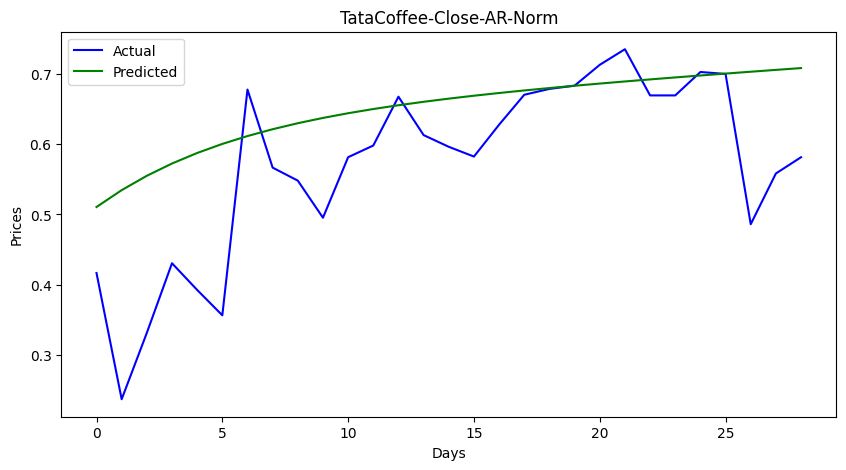

In [15]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [16]:
len(data1)

144

In [34]:
y_test

array([[0.41682071],
       [0.23752319],
       [0.33179288],
       [0.43068393],
       [0.39279108],
       [0.35674678],
       [0.67744926],
       [0.56654354],
       [0.54805926],
       [0.49537893],
       [0.58133075],
       [0.59796677],
       [0.66728285],
       [0.61275426],
       [0.59611823],
       [0.58225502],
       [0.62754146],
       [0.67005538],
       [0.67837325],
       [0.68299432],
       [0.71256929],
       [0.73475038],
       [0.66913111],
       [0.66913111],
       [0.70240288],
       [0.69963035],
       [0.48613679],
       [0.55822539],
       [0.58133075]])

In [18]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [19]:
aTestNormTable

,Close
0,0.416821
1,0.237523
2,0.331793
3,0.430684
4,0.392791
5,0.356747
6,0.677449
7,0.566544
8,0.548059
9,0.495379


In [20]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)

In [21]:
actual_stock_price_test_ori

array([[204.25      ],
       [194.55000305],
       [199.6499939 ],
       [205.        ],
       [202.94999695],
       [201.        ],
       [218.3500061 ],
       [212.3500061 ],
       [211.3500061 ],
       [208.5       ],
       [213.1499939 ],
       [214.05000305],
       [217.80000305],
       [214.8500061 ],
       [213.94999695],
       [213.19999695],
       [215.6499939 ],
       [217.94999695],
       [218.3999939 ],
       [218.6499939 ],
       [220.25      ],
       [221.44999695],
       [217.8999939 ],
       [217.8999939 ],
       [219.69999695],
       [219.55000305],
       [208.        ],
       [211.8999939 ],
       [213.1499939 ]])

In [22]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [23]:
actual_stock_price_test_oriA

,Close
0,204.25
1,194.550003
2,199.649994
3,205.0
4,202.949997
5,201.0
6,218.350006
7,212.350006
8,211.350006
9,208.5


In [24]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [25]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

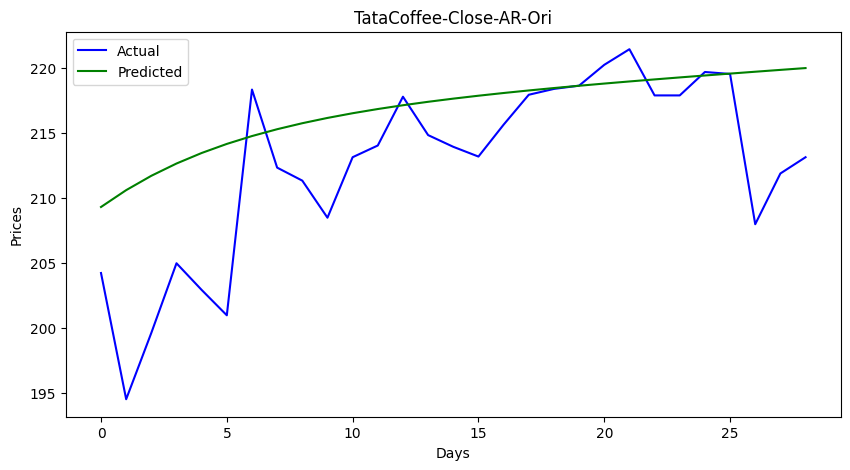

In [26]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [27]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 6.432116143299845
maPe-Testset: 0.02289672873998576


In [28]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [29]:
forecast

array([0.71051676, 0.71304295, 0.71554992, 0.71804083])

In [30]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,['fore'])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [31]:
forecast_stock_price_test_oriF

,Closefore
0,220.138958
1,220.275625
2,220.411252
3,220.54601


In [32]:
forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)

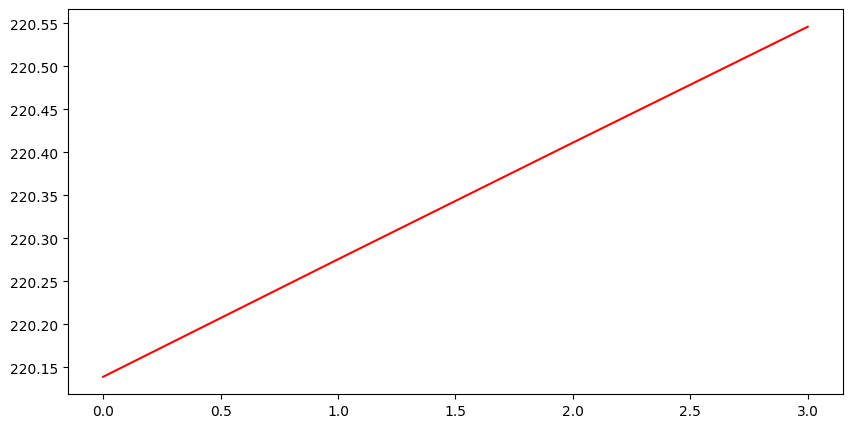

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")